In [4]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
from tensorflow.keras.applications import MobileNetV2

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow import keras

In [7]:
dataset_dir = "C:/Users/HP/OneDrive/Desktop/Project/data_set"

In [8]:
from PIL import Image
import os

folder = 'C:/Users/HP/OneDrive/Desktop/Project/data_set'

for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        img = Image.open(file_path)
        img.verify()  # Verifies if the image file is intact
    except (IOError, SyntaxError) as e:
        print(f"Bad file: {file_path} | Error: {e}")


Bad file: C:/Users/HP/OneDrive/Desktop/Project/data_set\Bad | Error: [Errno 13] Permission denied: 'C:\\Users\\HP\\OneDrive\\Desktop\\Project\\data_set\\Bad'
Bad file: C:/Users/HP/OneDrive/Desktop/Project/data_set\Good | Error: [Errno 13] Permission denied: 'C:\\Users\\HP\\OneDrive\\Desktop\\Project\\data_set\\Good'
Bad file: C:/Users/HP/OneDrive/Desktop/Project/data_set\Normal | Error: [Errno 13] Permission denied: 'C:\\Users\\HP\\OneDrive\\Desktop\\Project\\data_set\\Normal'


In [9]:
img_size = 224  # MobileNetV2 accepts 224x224 input
batch_size = 32

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 80% training, 20% validation split
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224,224 ),
   batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


In [12]:
import tensorflow as tf

def load_image(img_path):
    try:
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)  # or decode_png for PNG files
        img = tf.image.resize(img, [96, 128])
    except Exception as e:
        print(f"Error loading image: {img_path} - {str(e)}")
        return None  # or handle the error
    return img


In [13]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [14]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [15]:
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling to reduce dimensions
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [16]:
model = Model(inputs=base_model.input, outputs=predictions)

In [17]:
from tensorflow.keras.optimizers import Adam


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
epochs = 60
  # Adjust based on hardware and dataset size
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.4618 - loss: 1.5255

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4818 - loss: 1.4788 - val_accuracy: 0.6522 - val_loss: 1.0458
Epoch 2/60


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6522 - val_loss: 0.9960
Epoch 3/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6589 - loss: 1.1818 - val_accuracy: 0.7391 - val_loss: 0.5792
Epoch 4/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7391 - val_loss: 0.5714
Epoch 5/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 975ms/step - accuracy: 0.6849 - loss: 0.7856 - val_accuracy: 0.8696 - val_loss: 0.4951
Epoch 6/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9130 - val_loss: 0.4427
Epoch 7/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7591 - loss: 0.6002 - val_accuracy: 0.9130 - val_loss: 0.4135
Epoch 8/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7391 - val_loss: 0.5185
Epoch 9/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7799 - loss: 0.4888 - val_accuracy: 0.8696

In [21]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

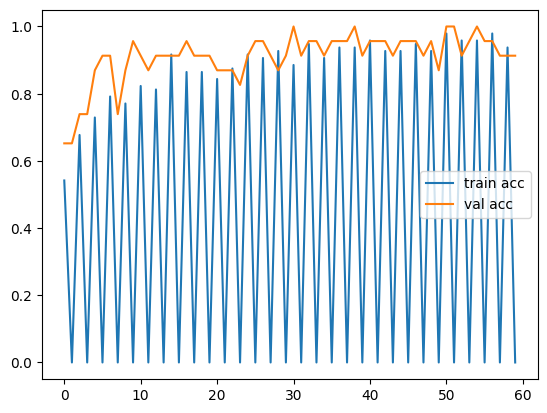

In [22]:
plt.plot(history.history['accuracy'], label= 'train acc')
plt.plot(history.history['val_accuracy'], label= 'val acc')
plt.legend()
# plt.saveig('vcc-acc-rps-1.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

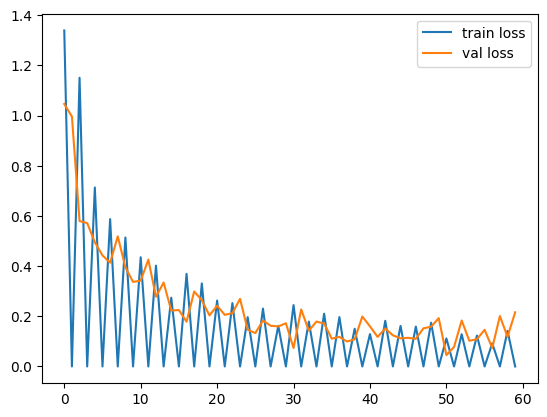

In [23]:
#loss
plt.plot(history.history['loss'], label= 'train loss')
plt.plot(history.history['val_loss'], label= 'val loss')
plt.legend()
# plt.saveig('vcc-loss-rps-1.png')
plt.show

In [24]:
pip install Flask


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [26]:
model = load_model('C:/Users\HP\OneDrive\Desktop\Project\my_model.keras')

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\HP\AppData\Local\Temp\ipykernel_3904\3999351429.py:1: SyntaxWarning: invalid escape sequence '\H'
  model = load_model('C:/Users\HP\OneDrive\Desktop\Project\my_model.keras')


In [27]:
veg_classes = ['Good', 'Normal','bad']

In [28]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

In [29]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [30]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
import cv2
out=['Good',
 'Normal',
 'Bad'
 ]

In [32]:
Veg_res = ["It is Fresh Brinjal.\nIt's Good for Cook.", 
          "It is 1 - 3 days Brinjal.\nIt's ok for Cook.",
           "It is 3 - 7 days Brinjal.\nIt's not good for Cook."]


<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\HP\AppData\Local\Temp\ipykernel_3904\1333125521.py:2: SyntaxWarning: invalid escape sequence '\H'
  img=cv2.imread("C:/Users\HP\OneDrive\Desktop\Project\Test images\PXL_20241105_174446170.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[6.9233337e-03 4.8400450e-02 6.0281205e-01 3.7983109e-04 6.8147485e-05
  2.8750750e-03 1.0893692e-03 8.4077983e-05 8.8468514e-06 3.3735883e-01]]
Bad
Result :-
It is 3 - 7 days Brinjal.
It's not good for Cook.


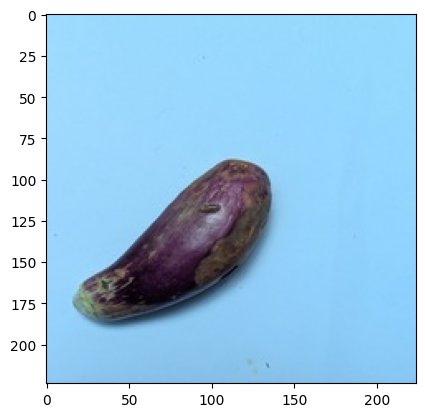

In [33]:
# Using a for loop to find the name in 'one' and print the corresponding element from 'two'
img=cv2.imread("C:/Users\HP\OneDrive\Desktop\Project\Test images\PXL_20241105_174446170.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
img=img/255.
import matplotlib.pyplot as plt
plt.imshow(img)
img=img.reshape(1,224,224,3)
import numpy as np
res=model.predict(img)
print(res)
search_name = out[np.argmax(res)]
print(search_name)

for i in range(len(out)):
    if out[i] == search_name:
        plant_name = out[i]
        uses = Veg_res[i]
        #print(f"{out[i]}")
        print(f"Result :-")
        print(f"{Veg_res[i]}")

In [34]:
model.save('my_model.keras')

In [35]:
import tensorflow as tf

# Load the Keras model
keras_model = tf.keras.models.load_model('my_model.keras')


In [36]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpruruk8ly\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpruruk8ly\assets


Saved artifact at 'C:\Users\HP\AppData\Local\Temp\tmpruruk8ly'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1963206874832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1963251892304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1963251893264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1963214448656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1963214453648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1963251892688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1963251894800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1963251894992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1963251894608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1963251892880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  19632518

In [37]:
# Save the TensorFlow Lite model as a .tflite file
with open('my_model.tflite', 'wb') as f:
    f.write(tflite_model)
